# Plotting in Python
This lecture will cover some of the plotting options in Python. We will continue to use the Framingham data set from the previous lecture.


In [ ]:
!gdown --id 1OnIYNtdVIVIgrxdDkL3L0chpG8DpWTjz

Downloading...
From: https://drive.google.com/uc?id=1OnIYNtdVIVIgrxdDkL3L0chpG8DpWTjz
To: /content/fram.txt
100% 1.46M/1.46M [00:00<00:00, 22.8MB/s]


In [ ]:
 %matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
from numpy.polynomial.polynomial import polyfit
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
fram = pd.read_csv("fram.txt", delimiter=",")

For simplifying the following plotting exercises, we will just look at the first 100 patients in the data set.


In [ ]:
fram = fram.head(100)

## Plotting data sets

There are many different ways to plot data in MATLAB and also several ways to generate these figures. Let's start by looking at the Age data from our revised Framingham data set.

In [ ]:
age = fram.AGE

Now to plot it we should use matplotlib.pyplot

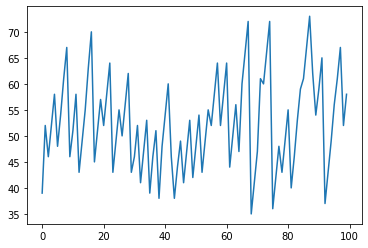

In [ ]:
age.plot()

The figure includes the ages of all 100 patients, with age given on the y-axis and the index on the x-axis. Clearly we need to add some information to this plot and find a better way to display the data.

When viewing the plot in a figure window, we can use the Insert tab to add elements such as axis labels and titles. When you are done adding these features, there is an option to generate the code for these changes (click File then Generate Code).

As we saw, plotting with one variable outputs the index on the x-axis. However, the plot command is typically used with two variables. Let's plot Age vs. BMI. First store the BMI data in an array.

In [ ]:
BMI = fram.BMI;

In addition to adding this variable, we should include axis labels and a title to our plot. Because we are using discrete data points, it also makes sense to use a different marker symbol as opposed to a line.


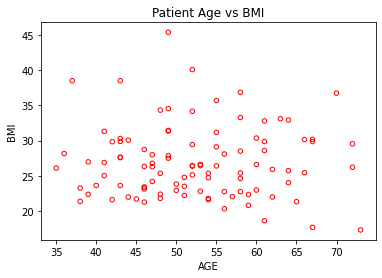

In [ ]:
pd.concat([BMI, age], axis=1).plot.scatter(x='AGE', y='BMI', marker="o", c="", edgecolors="r", title="Patient Age vs BMI")


### Log-Log
The loglog function simply generates a plot with a log scale on both axes. This may not necessarily be a useful tool for the variables in the Framingham data set, but let's try it on the Glucose data as an example. 


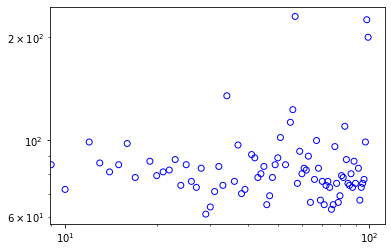

In [ ]:
plt.scatter(fram.GLUCOSE.index, fram.GLUCOSE, marker="o", c="", edgecolors='b')
plt.xscale('log')
plt.yscale('log')

plt.show()

### Bar Graphs
Bar graphs are useful for comparing data from different groups. 

Let's start with a simple example: use the bar command to create a graph showing the age of the first ten patients and another graph showing the BMI of the same group.


Text(0, 0.5, 'Age')

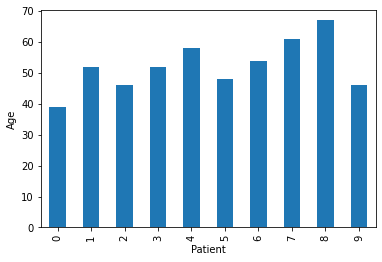

In [ ]:
age[:10].plot.bar()
plt.xlabel("Patient")
plt.ylabel("Age")

Text(0, 0.5, 'BMI')

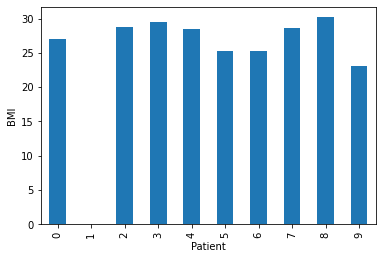

In [ ]:
BMI[:10].plot.bar()
plt.xlabel("Patient")
plt.ylabel("BMI")

Note that the BMI for Patient 2 is missing.

For a more complicated example, create a bar graph that looks at gender versus average cigarettes smoked per day. First, we should classify data by gender and extract the Averagte Cigarettes Smoke Per Day for each gender. 

In [ ]:
male_cigs = fram.loc[fram.SEX==1, "CIGPDAY"].mean()
female_cigs = fram.loc[fram.SEX==2, "CIGPDAY"].mean()

Then craete the bar graph with the bar function

Text(0.5, 1.0, 'Gender vs. Smoking Habits')

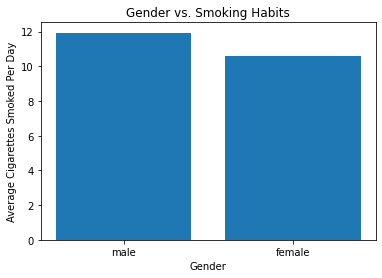

In [ ]:
plt.bar(['male','female'], [male_cigs, female_cigs])
plt.xlabel("Gender")
plt.ylabel('Average Cigarettes Smoked Per Day')
plt.title('Gender vs. Smoking Habits')


### Pie Chart
Pie charts are useful for looking at the composition of a group.

Let's create a pie chart which shows the gender distribution of the first 20 patients. The first step is to create an array which contains the quantity of each gender using the sum function.

In [ ]:
gender_count = [sum(fram.SEX[:20] == 1),sum(fram.SEX[:20] == 2)]
gender_count

[4, 16]

The pie function can then be used to display the elements of this matrix as a pie chart.


Text(0.5, 1.0, 'Gender Distribution')

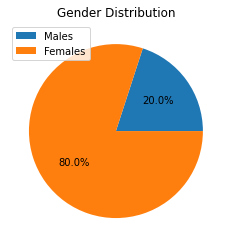

In [ ]:
plt.pie(gender_count, autopct='%1.1f%%')
plt.legend(['Males','Females'])
plt.title('Gender Distribution')

Now we will make a pie chart which shows the education levels (1 to 4) for all 100 patients. Again, the first step is extracting these four values and putting them into an array. We will use a for loop to create this array.

In [ ]:
education_count = []
for i in range(1,5):
    education_count.append(sum(fram.educ==i))

education_count

[34, 33, 18, 9]

We need to make sure that the sum of our array elements is equal to 100, as we want to make sure the entire patient group is represented in the pie chart


In [ ]:
sum(education_count)

94

We know that the Framingham data set contains some missing values. Confirm that this is the case with our education data.

In [ ]:
nan = sum(fram.educ.isnull())
nan

6

As expected, we are missing six data points, which would bring the total to 100. Add the missing data count to the education array so that it is incorported into the pie chart.

In [ ]:
education_count.append(nan)
education_count


[34, 33, 18, 9, 6]

We are finally ready to make the pie chart. 


In [ ]:
labels = ['1', '2', '3', '4','No Data']

Text(0.5, 1.0, 'Framingham Education Levels')

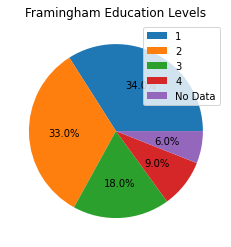

In [ ]:
plt.pie(education_count, autopct='%1.1f%%')
plt.legend(labels)
plt.title('Framingham Education Levels')

### Histograms
Histograms are used to look at the distribution of continuous data. The data set is displayed as a series of bins, which we can adjust to our preferences.

Use the histogram command to look at the distribution of age in the 100 patients (we created a 2-D line plot of this data earlier in the lesson).


Text(0, 0.5, 'Frequency')

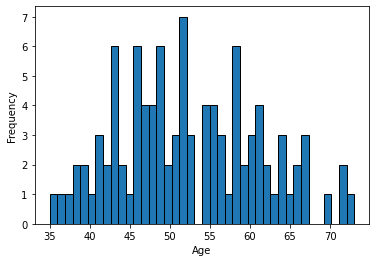

In [ ]:
plt.hist(age,bins=40, edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Frequency")


The histogram plot is much more informative and easier to read than our original 2-D line plot from earlier in the lesson. We can easily see which ages are more common and determine if the distribution is fairly normal.

Next, create a histogram showing the heart rate distribution and assign it to a variable, HR_histogram. 


Text(0, 0.5, 'Frequency')

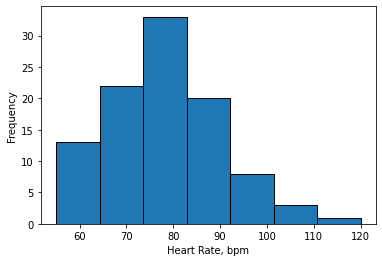

In [ ]:
HR_histogram = plt.hist(fram.HEARTRTE, bins=7, edgecolor='black');
plt.xlabel('Heart Rate, bpm')
plt.ylabel('Frequency')

By assigning the histogram to a variable, we can now use dot notation to adjust the plot properties. Break down the data into 10 bins and change the bin color. 

Text(0, 0.5, 'Frequency')

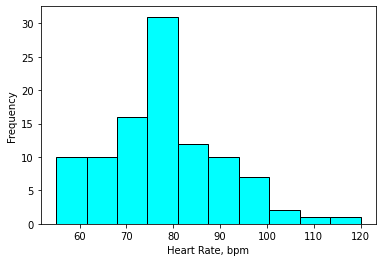

In [ ]:
HR_histogram = plt.hist(fram.HEARTRTE, bins=10, edgecolor='black', color="cyan");
plt.xlabel('Heart Rate, bpm')
plt.ylabel('Frequency')

Another useful feature of the histogram command in Python is the ability to compare two distributions in the same figure. For example, we can look at the distribution of total cholesterol in males versus females. Create an array containing the cholesterol data for males and add the code "hold on" afterwards.


(array([ 1.,  3.,  4., 11.,  9.,  7.,  5.,  3.,  2.,  2.]),
 array([159. , 177.4, 195.8, 214.2, 232.6, 251. , 269.4, 287.8, 306.2,
        324.6, 343. ]),
 <a list of 10 Patch objects>)

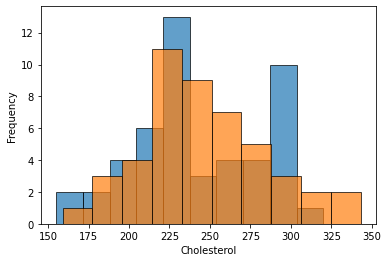

In [ ]:
male_cholesterol = fram.TOTCHOL[fram.SEX==1]
plt.hist(male_cholesterol, 10, alpha=0.7, edgecolor='black')
plt.xlabel("Cholesterol")
plt.ylabel("Frequency")
female_cholesterol = fram.TOTCHOL[fram.SEX==2]

plt.hist(female_cholesterol, 10, alpha=0.7, edgecolor='black')



### Boxplots
Boxplots are also helpful for looking at data distribution. In addition to showing the shape of the distribution, boxplots display the median value, the interquartile range, minimum/maxmimum values, and outlier points.

Use the boxplot command to examine total cholesterol versus sex.

Text(0.5, 1.0, '')

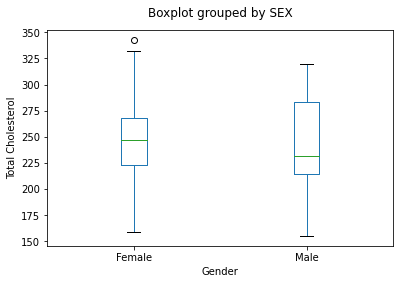

In [ ]:
pd.concat([fram.TOTCHOL,fram.SEX.replace(1, "Male").replace(2, "Female")], axis=1).boxplot(by="SEX",grid=False)
plt.xlabel('Gender')
plt.ylabel('Total Cholesterol')
plt.title("")

As another example, create a boxplot showing how blood glucose varies between the patients without diabetes (0) and with diabetes (1).


Text(0.5, 1.0, '')

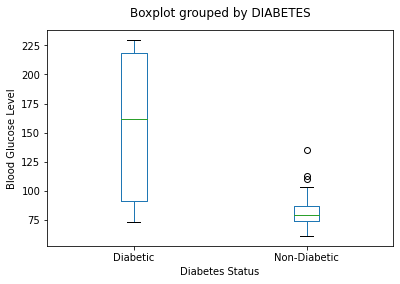

In [ ]:
pd.concat([fram.GLUCOSE,fram.DIABETES.replace(0, "Non-Diabetic").replace(1, "Diabetic")], axis=1).boxplot(by="DIABETES", grid=False, )
plt.xlabel('Diabetes Status')
plt.ylabel('Blood Glucose Level')
plt.title("")


### Correlation

Python has many tools for examining the relationship between variables. Use the numpy.polynomial.polynomial.polyfit command to plot the least squares regression line for systolic and diastolic blood pressure. 

Text(0, 0.5, 'Diastolic BP, mmHg')

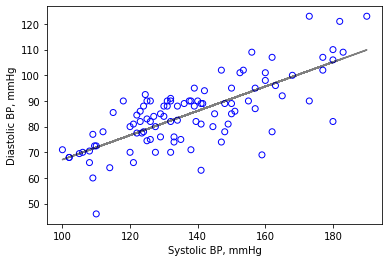

In [ ]:
plt.scatter(fram.SYSBP,fram.DIABP, edgecolors="b", c="")
b, m = polyfit(fram.SYSBP.to_numpy(),fram.DIABP.to_numpy(), 1)
plt.plot(fram.SYSBP, b + m * fram.SYSBP, '-', alpha=0.5, c="black")
plt.xlabel('Systolic BP, mmHg')
plt.ylabel('Diastolic BP, mmHg')

Next, use the numpy.corrcoef function to calculate the correlation coefficient between systolic and diastolic blood pressure. The correlation coefficient, r, indicates the strength and direction of the relationship between the two variables.


In [ ]:
r = np.corrcoef(fram.SYSBP,fram.DIABP)[0,1]
r

0.7428967676751536

Or use dataframe.corr()

In [ ]:
pd.concat([fram.SYSBP,fram.DIABP], axis=1).corr()["SYSBP"]["DIABP"]

0.7428967676751534

The coefficient of determination, , is equal to the correlation coefficient raised to the power of 2:


In [ ]:
r ** 2

0.5518956074221911

The coefficient of determination measures the amount of variance of one variable that can be explained by the other. In our example, $r^2$ is equal to 0.5519. This means that 55.2% of the variance in the diastolic blood pressure can be explained by the systolic blood pressure data. This can be used as an indicator for how good of a fit the least squares regression line is. 

For another example, we will determine the coefficients of correlation and determination between BMI and blood glucose levels. 

Previous work with these variables showed that there is data missing from both the BMI and Glucose data sets. We must specify for the corr function to only use rows that do not have missing values.


In [ ]:
BMI_GLUCOSE_dropna = pd.concat([fram.BMI,fram.GLUCOSE], axis=1).dropna()
r_BMI_glucose = BMI_GLUCOSE_dropna.corr()["BMI"]["GLUCOSE"]
r_BMI_glucose

0.3384633551402865

In [ ]:
r2_BMI_glucose = r_BMI_glucose ** 2
r2_BMI_glucose

0.11455744277281972

The correlation between these two variables is not nearly as strong as in the previous example with the systolic and diastolic blood pressures. Create a scatter plot and least-squares line to better visualize the relationship between BMI and blood glucose levels.


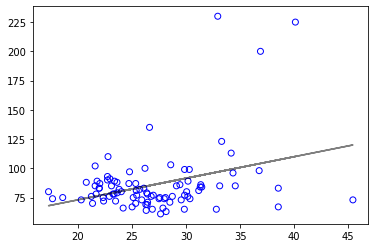

In [ ]:
plt.scatter(BMI_GLUCOSE_dropna.BMI, BMI_GLUCOSE_dropna.GLUCOSE, c="", edgecolors="b")
b, m = polyfit(BMI_GLUCOSE_dropna.BMI.to_numpy(), BMI_GLUCOSE_dropna.GLUCOSE.to_numpy(), 1)
plt.plot(BMI_GLUCOSE_dropna.BMI, b + m * BMI_GLUCOSE_dropna.BMI, '-', alpha=0.5, c="black")

### Visualizing Distributions
The gscatter function allows us to plot two variables against each other, such as Glucose and BMI, and then separate those data points by group. The grouping variable must be in the form of a categorical variable, such as Diabetes.

Use seaborn.lmplot to plot glucose versus BMI, grouped by diabetes.


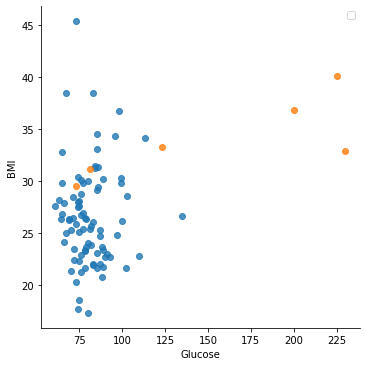

In [ ]:
# gscatter(fram.GLUCOSE, fram.BMI, fram.DIABETES)
sns.lmplot(x="GLUCOSE", y="BMI", data=fram, fit_reg=False, hue="DIABETES", legend=False)
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend('Non-Diabetic','Diabetic')
# pd.concat([fram.GLUCOSE, fram.BMI, fram.DIABETES], axis=1)


In this example, seaborn.lmplot makes it easy to see that essentially all of the data points at high glucose levels belong to patients with diabetes.

Repeat this process with systolic blood pressure versus total cholesterol, grouped by cardiovascular disease.

Text(3.549999999999997, 0.5, 'Total Cholesterol')

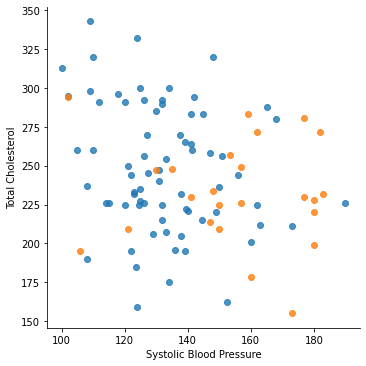

In [ ]:
sns.lmplot(x="SYSBP", y="TOTCHOL", data=fram, fit_reg=False, hue="CVD", legend=False)
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Total Cholesterol')

Unlike the last example, there aren't any apparents trends between the data groups. Upon close inspection, it appears that a slight majority of patients with higher blood pressure also suffered from CVD. In some cases, we may want to use this tool to help confirm that the data points are equally distributed throughout the different categories.

## Further Practice
### Distribution of Blood Glucose Levels


Text(0, 0.5, 'Frequency')

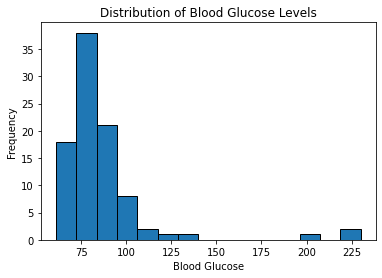

In [ ]:
plt.hist(fram.GLUCOSE,15, edgecolor="black")
plt.title('Distribution of Blood Glucose Levels')
plt.xlabel('Blood Glucose')
plt.ylabel('Frequency')


### Boxplot: Gender versus Heart Rate


Text(0.5, 0, 'Gender')

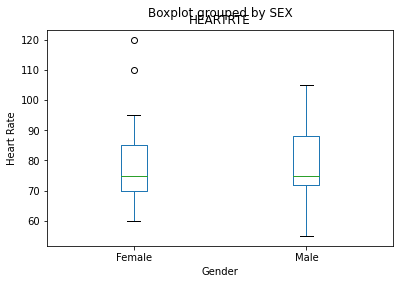

In [ ]:
pd.concat([fram.HEARTRTE,fram.SEX.replace(1, "Male").replace(2, "Female")], axis=1).boxplot(by="SEX",grid=False)
plt.ylabel('Heart Rate')
plt.xlabel('Gender')

### Education vs BMI
What is best way to show this relationship?


Text(0.5, 0, 'Education Level')

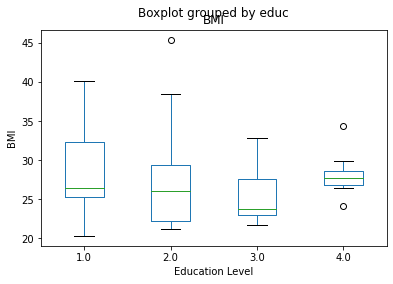

In [ ]:
pd.concat([fram.BMI,fram.educ], axis=1).boxplot(by="educ",grid=False)
plt.ylabel('BMI')
plt.xlabel('Education Level')